In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

from IC.invisible_cities.reco import paolina_functions    as plf

In [2]:
evt_number = 7
filepath = f'/Users/halmamol/NEXT/nexus/'
filename_highE = 'NEW_NeutronGun_4pi_highE.next.h5'
filename_lowE = 'NEW_NeutronGun_4pi.next.h5'
ngenerated = 100000
h5file_highE = filepath+filename_highE
h5file_lowE = filepath+filename_lowE

Analysis based in a Neutron Gun simulation, located in the **SOURCE_PORT_UP** at (0, 315, 275)mm where neutrons are pointing towards the detector volume.
Important **parameters** in the simulation:
 - **Pressure:** 10. bar
 - **EL field:** 15 kV/cm
 - **Gas:** Depleted Xe

## HIGH ENERGY - 2MeV neutrons
### Checking different processes from neutron interaction

In [3]:
particles = pd.read_hdf(h5file_highE, 'MC/particles')
mother_particles = particles[particles.primary == 1]
daughter_particles = particles[particles.mother_id == 1]

In [4]:
mother_particles

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-0.184382,...,-0.286277,-48.232418,37.892128,-0.0,-0.0,0.0,2.0,39.505325,none,neutronInelastic
397,1,1,neutron,1,0,0.0,315.149994,275.100006,0.0,2.228415,...,27.025532,-45.679955,30.744490,0.0,0.0,0.0,2.0,627.058472,none,neutronInelastic
437,2,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-38.324654,...,-10.249715,-13.217708,59.012684,0.0,0.0,-0.0,2.0,259.661621,none,neutronInelastic
603,3,1,neutron,1,0,0.0,315.149994,275.100006,0.0,3.037846,...,22.363903,-34.682285,-45.379032,0.0,-0.0,-0.0,2.0,8.331873,none,neutronInelastic
932,4,1,neutron,1,0,0.0,315.149994,275.100006,0.0,80.345322,...,-7.605218,-58.190758,17.839787,0.0,0.0,0.0,2.0,541.114685,none,neutronInelastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325788,10145,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-6.064895,...,-45.238277,-24.912704,-33.092552,-0.0,-0.0,-0.0,2.0,8.223216,none,neutronInelastic
2325933,10146,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-47.530338,...,-40.819462,-39.823563,22.585764,0.0,-0.0,0.0,2.0,77.365547,none,neutronInelastic
2326183,10147,1,neutron,1,0,0.0,315.149994,275.100006,0.0,227.999512,...,25.390865,-54.808147,-10.659840,-0.0,-0.0,-0.0,2.0,780.808655,none,nCapture
2326339,10148,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-53.544323,...,-3.902801,-24.590673,56.056477,-0.0,-0.0,0.0,2.0,127.990662,none,neutronInelastic


In [5]:
configuration = pd.read_hdf(h5file_highE, 'MC/configuration')

In [6]:
# Total amount of events 
ninteractions = mother_particles.event_id.nunique()
print(f'Number of events interacting {100*ninteractions/ngenerated}%')

Number of events interacting 10.15%


Neutron interactions in the detector volume:

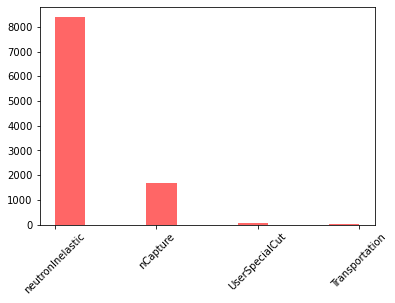

In [7]:
neutron_interactions = mother_particles.final_proc
plt.hist(neutron_interactions, alpha=0.6, color='r')
plt.xticks(rotation=45)

plt.show()

In [8]:
ninteractions_nInelastic = mother_particles[mother_particles.final_proc == "neutronInelastic"].event_id.nunique()
ninteractions_nCapture = mother_particles[mother_particles.final_proc == "nCapture"].event_id.nunique()
ninteractions_Transportation = mother_particles[mother_particles.final_proc == "Transportation"].event_id.nunique()
ninteractions_UserSpecialCut = mother_particles[mother_particles.final_proc == "UserSpecialCut"].event_id.nunique()

print(f'Inelastic scattering {100*ninteractions_nInelastic/ninteractions}%')
print(f'Neutron Capture {100*ninteractions_nCapture/ninteractions}%')
print(f'Transportation {100*ninteractions_Transportation/ninteractions}%')
print(f'"User Special Cut" {100*ninteractions_UserSpecialCut/ninteractions}%')

Inelastic scattering 82.62068965517241%
Neutron Capture 16.551724137931036%
Transportation 0.2955665024630542%
"User Special Cut" 0.5320197044334976%


In [9]:
ninteractions_nInelastic

8386

At ~high energies, inelastic scattering is the dominant process. Checking in which isotopes it's the most dominant process:

In [10]:
n_inelscatt = daughter_particles[(daughter_particles.creator_proc == "neutronInelastic") 
                   & (daughter_particles.particle_name != "gamma") 
                   & (daughter_particles.particle_name != "neutron") ].particle_name

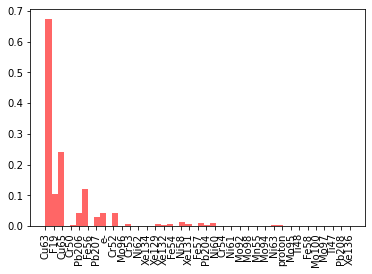

In [11]:
plt.hist(n_inelscatt, density=True, alpha=0.6, bins = 50, color='r')
plt.xticks(rotation=90)

plt.show()

I'm going to check the deposited energy in the volumen when there's an inelastic scattering. To do so, I need to check which events are caused by neutronInelastic, and then check the total energy deposited by the hits information

In [12]:
non_neutronInelastic_events = mother_particles[~(mother_particles.final_proc == "neutronInelastic")].event_id.unique()

non_neutronInelastic_events

array([   11,    20,    21, ..., 10136, 10137, 10147], dtype=int32)

In [13]:
len(non_neutronInelastic_events)

1764

In [14]:
hits_2MeV = pd.read_hdf(h5file_highE, 'MC/hits')
hits_2MeV

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,1.227916,61.969467,189.044510,88894.554688,0.000246,ACTIVE,163,0
1,0,24.374264,107.053932,315.343811,88895.851562,0.000212,ACTIVE,163,1
2,0,24.374191,107.053864,315.343842,88895.859375,0.000021,ACTIVE,207,0
3,0,24.374224,107.053909,315.343719,88895.859375,0.000021,ACTIVE,206,0
4,0,24.374317,107.054001,315.343872,88895.859375,0.000023,ACTIVE,205,0
...,...,...,...,...,...,...,...,...,...
991472,10149,89.792763,124.247047,114.512871,34772.539062,0.000859,ACTIVE,73,15
991473,10149,89.800186,124.244911,114.509048,34772.542969,0.003774,ACTIVE,73,16
991474,10149,89.802826,124.246651,114.508331,34772.542969,0.001308,ACTIVE,73,17
991475,10149,89.804649,124.246437,114.508110,34772.542969,0.001715,ACTIVE,73,18


In [15]:
detector_energy_2MeV = []
detector_x_2MeV = []
detector_y_2MeV = []
detector_z_2MeV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_2MeV[hits_2MeV.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    totalenergy = np.sum(et)
    totalx = np.sum(xt)
    totaly = np.sum(yt)
    totalz = np.sum(zt)
    if totalenergy != 0.0:
        detector_energy_2MeV.append(totalenergy)
        detector_x_2MeV.append(totalx)
        detector_y_2MeV.append(totaly)
        detector_z_2MeV.append(totalz)

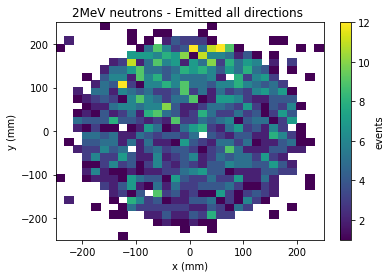

In [82]:
plt.hist2d(detector_x_2MeV, detector_y_2MeV, bins=(30, 30), range=((-250, 250), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('2MeV neutrons - Emitted all directions ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

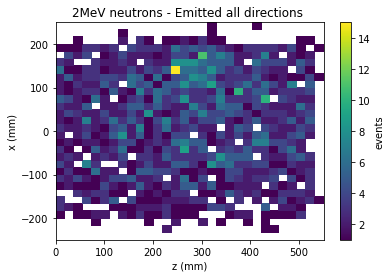

In [83]:
plt.hist2d(detector_z_2MeV, detector_y_2MeV, bins=(30, 30), range=((0, 550), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('z (mm)')
plt.ylabel('x (mm)')
plt.title('2MeV neutrons - Emitted all directions ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

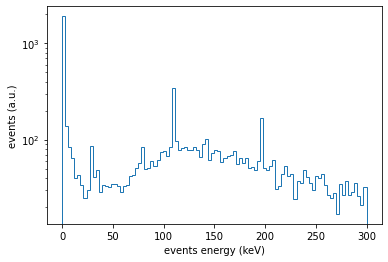

In [18]:
plt.hist(detector_energy_2MeV, bins = 100, range=(0,300), histtype='step')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.yscale('log')
plt.show()

In [20]:
evt_neutronInelastic    = ~hits_2MeV.event_id.isin(non_neutronInelastic_events) 


In [21]:
hits_neutronInelastic = hits_2MeV[evt_neutronInelastic]

In [22]:
neutronInelastic_energy_2MeV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:neutronInelastic_energy_2MeV.append(totalenergy)

In [23]:
len(neutronInelastic_energy_2MeV)

8386

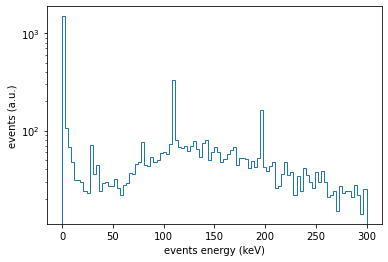

In [24]:
plt.hist(neutronInelastic_energy_2MeV, bins = 100, range=(0,300), histtype='step')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.yscale('log')
plt.show()

In [26]:
non_nCapture_events = mother_particles[~(mother_particles.final_proc == "nCapture")].event_id.unique()

evt_nCapture    = ~hits_2MeV.event_id.isin(non_nCapture_events) 

hits_nCapture = hits_2MeV[evt_nCapture]

In [27]:
nCapture_energy_2MeV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_nCapture[hits_nCapture.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:nCapture_energy_2MeV.append(totalenergy)

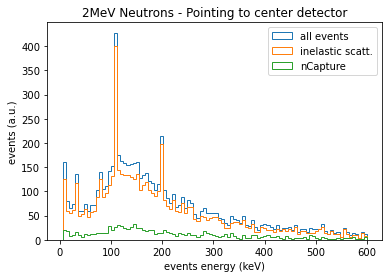

In [28]:
plt.hist(detector_energy_2MeV, bins = 100, range=(5,600), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_2MeV, bins = 100, range=(5,600), histtype='step', label = 'inelastic scatt.')
plt.hist(nCapture_energy_2MeV, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('2MeV Neutrons - Pointing to center detector')
#plt.yscale('log')
plt.legend(loc=1);
plt.show()

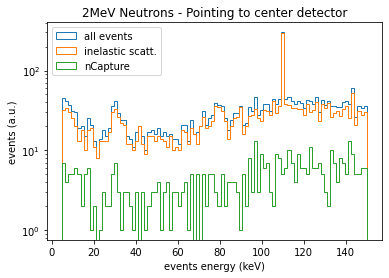

In [29]:
plt.hist(detector_energy_2MeV, bins = 100, range=(5,150), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_2MeV, bins = 100, range=(5,150), histtype='step', label = 'inelastic scatt.')
plt.hist(nCapture_energy_2MeV, bins = 100, range=(5,150), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('2MeV Neutrons - Pointing to center detector')
plt.yscale('log')
plt.legend(loc=2);
plt.show()

In [30]:
daugther_particles_neutronInelastic = daughter_particles[(daughter_particles.creator_proc == "neutronInelastic") 
                   & (daughter_particles.particle_name != "gamma") 
                   & (daughter_particles.particle_name != "neutron") ]
daugther_particles_neutronInelastic

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
39,0,3,Cu63,0,1,-0.184382,284.085083,299.505066,2.022868,-0.184382,...,-19.995028,-23.331455,41.950397,-0.0,-0.0,0.0,0.023070,0.000075,neutronInelastic,RadioactiveDecayBase
431,1,4,Cu63,0,1,2.228415,-129.517166,-49.672249,32.505280,2.228415,...,24.666718,65.647156,48.090092,0.0,0.0,0.0,0.061691,0.000121,neutronInelastic,RadioactiveDecayBase
454,2,5,Cu63,0,1,-38.324654,271.222809,280.489746,13.830554,-38.324646,...,82.605568,17.822813,-45.259289,0.0,0.0,-0.0,0.078406,0.000137,neutronInelastic,RadioactiveDecayBase
636,3,3,Cu63,0,1,3.037846,310.438873,268.935852,0.426633,3.037846,...,17.933046,-26.418037,-56.035881,0.0,-0.0,-0.0,0.035489,0.000093,neutronInelastic,RadioactiveDecayBase
953,4,5,F19,0,1,80.345322,-201.143829,264.989441,73.826088,80.345322,...,0.767006,-9.191211,14.423410,0.0,-0.0,0.0,0.008283,0.000088,neutronInelastic,RadioactiveDecayBase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325616,10144,3,Cu65,0,1,-8.128902,312.583466,266.447601,0.621945,-8.128903,...,-44.664433,15.424545,-31.647642,-0.0,0.0,-0.0,0.026746,0.000082,neutronInelastic,RadioactiveDecayBase
2325814,10145,3,Cu63,0,1,-6.064895,311.810059,270.663422,0.421069,-6.064896,...,-39.022141,-7.038159,-71.202980,-0.0,-0.0,-0.0,0.056670,0.000117,neutronInelastic,RadioactiveDecayBase
2325952,10146,3,Cu63,0,1,-47.530338,264.158020,304.599365,3.962954,-47.530338,...,53.355927,-45.648674,16.694937,0.0,-0.0,0.0,0.044446,0.000103,neutronInelastic,RadioactiveDecayBase
2326362,10148,3,Cu63,0,1,-53.544323,297.162689,389.332520,6.564455,-53.544323,...,-39.515430,-4.690601,26.350786,-0.0,-0.0,0.0,0.019434,0.000069,neutronInelastic,RadioactiveDecayBase


In [31]:
neutronInelastic_energy_Cu65, neutronInelastic_energy_Cu63, neutronInelastic_energy_Fe57 = [], [], []
neutronInelastic_energy_F19, neutronInelastic_energy_Ni63, neutronInelastic_energy_proton = [], [], []
neutronInelastic_energy_Fe56, neutronInelastic_energy_Xe129, neutronInelastic_energy_Xe132 = [], [], []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    part_int = daugther_particles_neutronInelastic[daugther_particles_neutronInelastic.event_id == evt_number].particle_name.unique()
    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:
        if part_int[0] == 'Cu65': neutronInelastic_energy_Cu65.append(totalenergy)
        elif part_int[0] == 'Cu63': neutronInelastic_energy_Cu63.append(totalenergy)
        elif part_int[0] == 'Fe57': neutronInelastic_energy_Fe57.append(totalenergy)
        elif part_int[0] == 'F19': neutronInelastic_energy_F19.append(totalenergy)
        elif part_int[0] == 'Ni63': neutronInelastic_energy_Ni63.append(totalenergy)
        elif part_int[0] == 'proton': neutronInelastic_energy_proton.append(totalenergy)
        elif part_int[0] == 'Fe56': neutronInelastic_energy_Fe56.append(totalenergy)
        elif part_int[0] == 'Xe129': neutronInelastic_energy_Xe129.append(totalenergy)
        elif part_int[0] == 'Xe132': neutronInelastic_energy_Xe132.append(totalenergy)
            

In [32]:
len(neutronInelastic_energy_Cu65)

1508

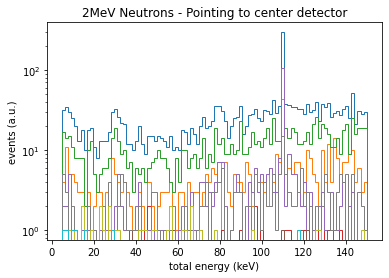

In [33]:
rangemin = 5
rangemax = 150
plt.hist(neutronInelastic_energy_2MeV, bins = 100, range=(rangemin,rangemax), histtype='step', label = "all inel. scatt.")
plt.hist(neutronInelastic_energy_Cu65, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Cu65")
plt.hist(neutronInelastic_energy_Cu63, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Cu63")
plt.hist(neutronInelastic_energy_Fe57, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Fe57")
plt.hist(neutronInelastic_energy_F19, bins = 100, range=(rangemin,rangemax), histtype='step', label = "F19")
plt.hist(neutronInelastic_energy_Ni63, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Ni63")
plt.hist(neutronInelastic_energy_proton, bins = 100, range=(rangemin,rangemax), histtype='step', label = "proton")
plt.hist(neutronInelastic_energy_Fe56, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Fe56")
plt.hist(neutronInelastic_energy_Xe129, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Xe129")
plt.hist(neutronInelastic_energy_Xe132, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Xe132")

plt.xlabel('total energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('2MeV Neutrons - Pointing to center detector')
#plt.legend(loc=2);
plt.yscale('log')
plt.show()

In [34]:
particles_evt = particles[particles.event_id == evt_number]
particles_evt_inel = particles_evt[particles_evt.creator_proc == 'neutronInelastic']
particles_evt_inel_atom = particles_evt_inel[(particles_evt_inel.particle_name != 'gamma') &
                                            (particles_evt_inel.particle_name != 'neutron')]

xt_atom = particles_evt_inel_atom.initial_x.values[0]
yt_atom = particles_evt_inel_atom.initial_y.values[0]
zt_atom = particles_evt_inel_atom.initial_z.values[0]
rt_atom = np.sqrt(xt_atom**2+yt_atom**2)

bx = np.array([xt_atom])
by = np.array([yt_atom])
bz = np.array([zt_atom])
br = np.array([rt_atom])

particles_evt_inel_gamma = particles_evt_inel[(particles_evt_inel.particle_name == 'gamma')]

xt_gamma = particles_evt_inel_gamma.final_x.values[0]
yt_gamma = particles_evt_inel_gamma.final_y.values[0]
zt_gamma = particles_evt_inel_gamma.final_z.values[0]

bx_g = np.array([xt_gamma])
by_g = np.array([yt_gamma])
bz_g = np.array([zt_gamma])

In [35]:
#particles_evt[particles_evt.mother_id == 2]
particles_evt

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
2326671,10149,1,neutron,1,0,0.000000,315.149994,275.100006,0.000000,21.907034,...,32.033592,-5.475667,-52.020454,-0.0,0.0,-0.0,2.000000,7.717841e+01,none,neutronInelastic
2326672,10149,5,gamma,0,1,21.907034,307.283417,212.687561,3.960902,30.685598,...,0.650367,-0.396693,-0.586364,-0.0,0.0,-0.0,0.961335,6.377180e+01,neutronInelastic,phot
2326673,10149,18,e-,0,5,30.685598,288.924805,178.438019,4.173622,30.685598,...,0.003525,-0.003936,0.005834,0.0,-0.0,0.0,0.000061,1.473075e-07,phot,msc
2326674,10149,17,e-,0,5,30.685598,288.924805,178.438019,4.173622,30.685598,...,0.001244,0.001734,-0.007576,0.0,0.0,-0.0,0.000061,1.473075e-07,phot,msc
2326675,10149,16,e-,0,5,30.685598,288.924805,178.438019,4.173622,30.685598,...,-0.011324,-0.009849,-0.026715,0.0,-0.0,-0.0,0.000918,1.563861e-05,phot,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326818,10149,143,e-,0,48,245.833435,144.297226,97.807724,34771.968750,245.833435,...,0.007338,-0.017112,0.024763,0.0,-0.0,0.0,0.000938,1.761702e-05,compt,eIoni
2326819,10149,142,e-,0,48,245.833435,144.297226,97.807724,34771.968750,245.833466,...,0.049330,-0.055200,0.051163,0.0,-0.0,0.0,0.007863,3.640711e-04,compt,eIoni
2326820,10149,141,e-,0,48,245.833435,144.297226,97.807724,34771.968750,245.836227,...,0.028905,0.353112,0.349793,0.0,0.0,0.0,0.202443,5.539392e-02,compt,eIoni
2326821,10149,140,e-,0,48,245.088654,131.895447,83.500282,34771.906250,245.088638,...,0.004017,0.000702,0.004173,-0.0,-0.0,0.0,0.000033,1.218642e-07,compt,msc


In [36]:
evt_hits = hits_2MeV[hits_2MeV.event_id == evt_number]
evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

xt = evt_hits.x
yt = evt_hits.y
zt = evt_hits.z
rt = np.sqrt(xt**2+yt**2)
et = evt_hits.energy*1000

In [37]:
#particles_evt[particles_evt.particle_id == 23]
evt_hits

,event_id,x,y,z,time,energy,label,particle_id,hit_id
991393,10149,90.138237,124.369713,114.109924,34772.527344,0.000107,ACTIVE,56,0
991394,10149,92.914848,131.160995,105.650810,34772.566406,0.000235,ACTIVE,56,1
991395,10149,92.914902,131.160965,105.650818,34772.566406,0.000021,ACTIVE,91,0
991396,10149,92.914833,131.161087,105.650764,34772.566406,0.000021,ACTIVE,90,0
991397,10149,92.914879,131.160995,105.650818,34772.566406,0.000021,ACTIVE,89,0
...,...,...,...,...,...,...,...,...,...
991472,10149,89.792763,124.247047,114.512871,34772.539062,0.000859,ACTIVE,73,15
991473,10149,89.800186,124.244911,114.509048,34772.542969,0.003774,ACTIVE,73,16
991474,10149,89.802826,124.246651,114.508331,34772.542969,0.001308,ACTIVE,73,17
991475,10149,89.804649,124.246437,114.508110,34772.542969,0.001715,ACTIVE,73,18


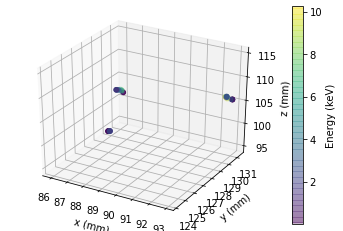

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(xt, yt, zt, c=et, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')

plt.show()

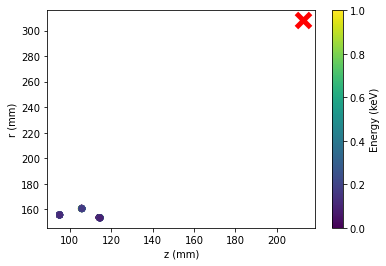

In [39]:
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

plt.scatter(zt, rt, cmap='viridis', c=et)
plt.scatter(bz, br, marker='x', s=200, linewidth=5, color='red')
#plt.scatter(bx_g, by_g, marker='x', s=200, linewidth=5, color='green')
plt.xlabel('z (mm)')
plt.ylabel('r (mm)')

cb = plt.colorbar(label='Energy (keV)')
plt.show()

## LOW ENERGY - 0.5MeV neutrons
### Checking different processes from neutron interaction

In [40]:
particles = pd.read_hdf(h5file_lowE, 'MC/particles')
mother_particles = particles[particles.primary == 1]
daughter_particles = particles[particles.mother_id == 1]

In [41]:
mother_particles

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,1,neutron,1,0,0.0,315.149994,275.100006,0.0,28.738480,...,8.792311,-7.345711,28.435034,0.0,-0.0,0.0,0.5,579.551392,none,nCapture
256,1,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-140.853683,...,-0.351682,-29.685097,-7.647660,-0.0,0.0,-0.0,0.5,358.435455,none,nCapture
762,2,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-8.929665,...,-10.248964,5.606350,-28.343306,0.0,0.0,-0.0,0.5,123.803101,none,neutronInelastic
1117,3,1,neutron,1,0,0.0,315.149994,275.100006,0.0,157.323013,...,-6.418616,-19.817993,22.491419,0.0,0.0,-0.0,0.5,1459.619995,none,nCapture
1255,4,1,neutron,1,0,0.0,315.149994,275.100006,0.0,168.551071,...,2.952417,-23.933105,-18.928947,-0.0,-0.0,0.0,0.5,1055.407959,none,neutronInelastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973746,8896,1,neutron,1,0,0.0,315.149994,275.100006,0.0,266.317444,...,-20.016949,-0.063193,-23.219240,0.0,0.0,0.0,0.5,2739.067871,none,nCapture
1974152,8897,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-223.864380,...,-4.685467,-16.701338,-25.277006,0.0,0.0,0.0,0.5,2210.203125,none,nCapture
1974427,8898,1,neutron,1,0,0.0,315.149994,275.100006,0.0,98.465233,...,-28.121525,-2.283321,-11.990898,0.0,0.0,0.0,0.5,1273.550171,none,nCapture
1974807,8899,1,neutron,1,0,0.0,315.149994,275.100006,0.0,29.563625,...,5.614534,-29.397224,6.640447,-0.0,-0.0,-0.0,0.5,955.441345,none,nCapture


In [42]:
configuration = pd.read_hdf(h5file_lowE, 'MC/configuration')

In [43]:
# Total amount of events 
ninteractions = mother_particles.event_id.nunique()
print(f'Number of events interacting {100*ninteractions/ngenerated}%')

Number of events interacting 8.901%


Neutron interactions in the volume

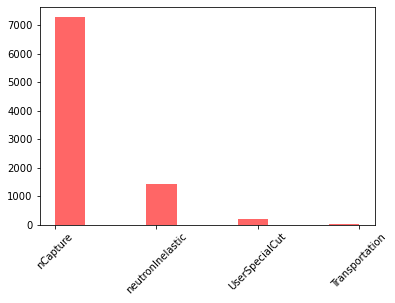

In [44]:
neutron_interactions = mother_particles.final_proc
plt.hist(neutron_interactions, alpha=0.6, color='r')
plt.xticks(rotation=45)

plt.show()

In this case we're dominated by neutron capture processes. 

In [45]:
ninteractions_nInelastic = mother_particles[mother_particles.final_proc == "neutronInelastic"].event_id.nunique()
ninteractions_nCapture = mother_particles[mother_particles.final_proc == "nCapture"].event_id.nunique()
ninteractions_Transportation = mother_particles[mother_particles.final_proc == "Transportation"].event_id.nunique()
ninteractions_UserSpecialCut = mother_particles[mother_particles.final_proc == "UserSpecialCut"].event_id.nunique()

print(f'Inelastic scattering {100*ninteractions_nInelastic/ninteractions}%')
print(f'Neutron Capture {100*ninteractions_nCapture/ninteractions}%')
print(f'Transportation {100*ninteractions_Transportation/ninteractions}%')
print(f'"User Special Cut" {100*ninteractions_UserSpecialCut/ninteractions}%')

Inelastic scattering 15.874620829120323%
Neutron Capture 81.65374677002583%
Transportation 0.4044489383215369%
"User Special Cut" 2.0671834625322996%


Looking in detail into neutron inelastic processes

In [46]:
n_inelscatt = daughter_particles[(daughter_particles.creator_proc == "neutronInelastic") 
                   & (daughter_particles.particle_name != "gamma") 
                   & (daughter_particles.particle_name != "neutron") ].particle_name

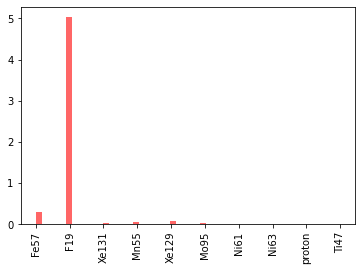

In [47]:
plt.hist(n_inelscatt, density=True, alpha=0.6, bins = 50, color='r')
plt.xticks(rotation=90)

plt.show()

I'm going to check in this case the deposited energy in the volume due to neutron inelastic processes

In [48]:
non_neutronInelastic_events = mother_particles[~(mother_particles.final_proc == "neutronInelastic")].event_id.unique()

non_neutronInelastic_events

array([   0,    1,    3, ..., 8898, 8899, 8900], dtype=int32)

In [49]:
hits_500keV = pd.read_hdf(h5file_lowE, 'MC/hits')
hits_500keV

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,-18.494698,92.543610,313.986053,8959.851562,0.000212,ACTIVE,4,0
1,0,-18.494678,92.543678,313.985992,8959.851562,0.000023,ACTIVE,246,0
2,0,-18.494694,92.543610,313.986053,8959.851562,0.000047,ACTIVE,245,0
3,0,-18.494699,92.543610,313.986053,8959.851562,0.000021,ACTIVE,244,0
4,0,-18.494701,92.543625,313.986053,8959.851562,0.000045,ACTIVE,243,0
...,...,...,...,...,...,...,...,...,...
914106,8900,160.835419,-76.126122,350.411285,207957.875000,0.000958,ACTIVE,129,0
914107,8900,160.781998,-76.081436,350.463959,207957.875000,0.005478,ACTIVE,129,1
914108,8900,160.721802,-76.108597,350.474365,207957.875000,0.001962,ACTIVE,129,2
914109,8900,160.739334,-76.063278,350.509705,207957.875000,0.027304,ACTIVE,129,3


In [51]:
evt_neutronInelastic    = ~hits_500keV.event_id.isin(non_neutronInelastic_events) 

hits_neutronInelastic = hits_500keV[evt_neutronInelastic]

In [52]:
neutronInelastic_energy_500keV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:neutronInelastic_energy_500keV.append(totalenergy)

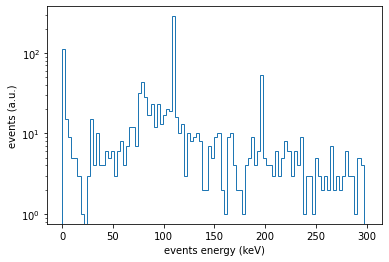

In [53]:
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(0,300), histtype='step')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.yscale('log')
plt.show()

In [54]:
detector_energy_500keV = []
detector_x_500keV = []
detector_y_500keV = []
detector_z_500keV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_500keV[hits_500keV.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    totalenergy = np.sum(et)
    totalx = np.sum(xt)
    totaly = np.sum(yt)
    totalz = np.sum(zt)
    if totalenergy != 0.0:
        detector_energy_500keV.append(totalenergy)
        detector_x_500keV.append(totalx)
        detector_y_500keV.append(totaly)
        detector_z_500keV.append(totalz)

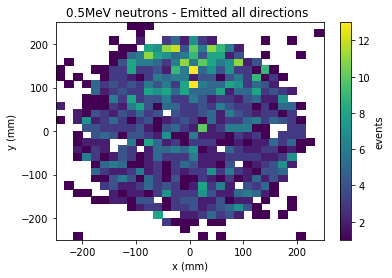

In [80]:
plt.hist2d(detector_x_500keV, detector_y_500keV, bins=(30, 30), range=((-250, 250), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('0.5MeV neutrons - Emitted all directions ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

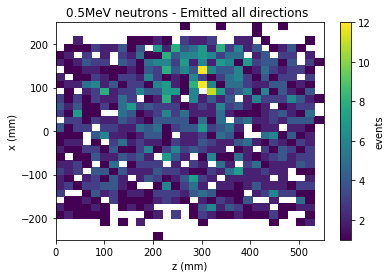

In [81]:
plt.hist2d(detector_z_500keV, detector_y_500keV, bins=(30, 30), range=((0, 550), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('z (mm)')
plt.ylabel('x (mm)')
plt.title('0.5MeV neutrons - Emitted all directions ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

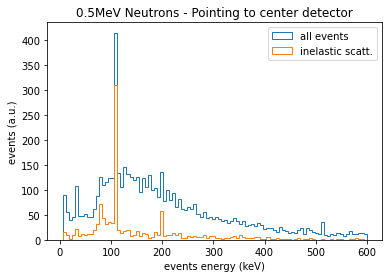

In [57]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'inelastic scatt.')
#plt.hist(nCapture_energy, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('0.5MeV Neutrons - Pointing to center detector')
#plt.yscale('log')
plt.legend(loc=1);
plt.show()

In [58]:
non_nCapture_events = mother_particles[~(mother_particles.final_proc == "nCapture")].event_id.unique()

evt_nCapture    = ~hits_500keV.event_id.isin(non_nCapture_events) 

hits_nCapture = hits_500keV[evt_nCapture]

In [59]:
nCapture_energy_500keV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_nCapture[hits_nCapture.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:nCapture_energy_500keV.append(totalenergy)

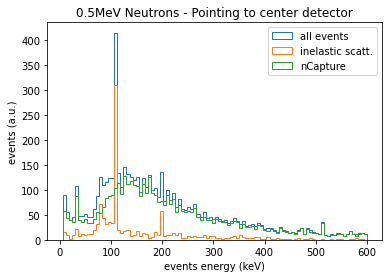

In [60]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'inelastic scatt.')
plt.hist(nCapture_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('0.5MeV Neutrons - Pointing to center detector')
#plt.yscale('log')
plt.legend(loc=1);
plt.show()

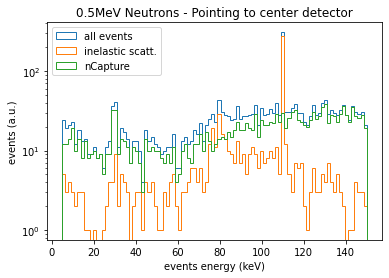

In [61]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,150), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(5,150), histtype='step', label = 'inelastic scatt.')
plt.hist(nCapture_energy_500keV, bins = 100, range=(5,150), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('0.5MeV Neutrons - Pointing to center detector')
plt.yscale('log')
plt.legend(loc=2);
plt.show()

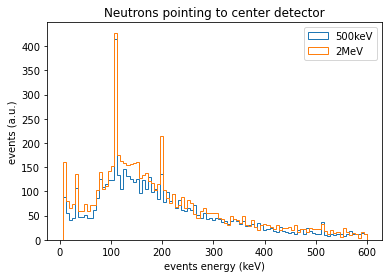

In [62]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,600), histtype='step', label = '500keV')
plt.hist(detector_energy_2MeV, bins = 100, range=(5,600), histtype='step', label = '2MeV')
#plt.hist(nCapture_energy, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('Neutrons pointing to center detector')
#plt.yscale('log')
plt.legend(loc=1);
plt.show()

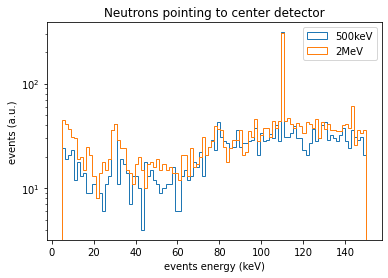

In [63]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,150), histtype='step', label = '500keV')
plt.hist(detector_energy_2MeV, bins = 100, range=(5,150), histtype='step', label = '2MeV')
#plt.hist(nCapture_energy, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('Neutrons pointing to center detector')
plt.yscale('log')
plt.legend(loc=1);
plt.show()

In [84]:
npz_file = '/Users/halmamol/NEXT/NBarrays/neutrons_4pi'
np.savez(npz_file, detector_energy_500keV=detector_energy_500keV, detector_energy_2MeV=detector_energy_2MeV)


In [64]:
daugther_particles_neutronInelastic = daughter_particles[(daughter_particles.creator_proc == "neutronInelastic") 
                   & (daughter_particles.particle_name != "gamma") 
                   & (daughter_particles.particle_name != "neutron") ]
daugther_particles_neutronInelastic

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
763,2,5,Fe57,0,1,-8.929665,331.494415,156.919357,12.679428,-8.929665,...,7.133482,25.785631,-39.942390,0.0,0.0,-0.0,0.021795,0.000043,neutronInelastic,RadioactiveDecayBase
1265,4,3,F19,0,1,168.551071,-126.236237,446.392365,114.784561,168.551071,...,-10.116973,-18.012804,0.710860,-0.0,-0.0,0.0,0.012076,0.000106,neutronInelastic,RadioactiveDecayBase
1697,6,4,F19,0,1,4.342166,216.027054,285.545563,12.590521,4.342147,...,-9.147630,-31.888199,-1.796882,-0.0,-0.0,-0.0,0.031193,0.000177,neutronInelastic,RadioactiveDecayBase
3317,18,4,F19,0,1,25.219128,213.215652,316.934021,27.911764,25.219135,...,10.128257,7.802350,-14.838229,0.0,0.0,-0.0,0.010842,0.000101,neutronInelastic,RadioactiveDecayBase
3675,19,3,F19,0,1,-17.062023,217.041992,222.894241,11.500751,-17.062006,...,12.855265,-12.290510,-18.537264,0.0,-0.0,-0.0,0.018651,0.000133,neutronInelastic,RadioactiveDecayBase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951557,8811,3,F19,0,1,-25.850674,-215.804474,496.874329,382.019836,-25.850643,...,8.502321,-42.302231,-22.169397,0.0,-0.0,-0.0,0.066505,0.000290,neutronInelastic,RadioactiveDecayBase
1955492,8825,3,F19,0,1,-174.191666,116.580360,342.774719,31.608656,-174.191803,...,-40.988800,-8.383240,13.371274,-0.0,-0.0,0.0,0.054519,0.000253,neutronInelastic,RadioactiveDecayBase
1962351,8853,5,F19,0,1,-114.686363,177.519501,268.031403,23.708834,-114.686356,...,4.760587,-14.759490,2.460601,0.0,-0.0,0.0,0.006968,0.000080,neutronInelastic,RadioactiveDecayBase
1963632,8860,4,F19,0,1,130.703049,168.424606,363.360291,32.435715,130.703049,...,2.568093,-32.404484,15.972166,0.0,-0.0,0.0,0.037071,0.000197,neutronInelastic,RadioactiveDecayBase


In [65]:
neutronInelastic_energy_Fe57 = []
neutronInelastic_energy_F19 = []
neutronInelastic_energy_Xe129, neutronInelastic_energy_Xe132 = [], []

neutronInelastic_x_Fe57 = []
neutronInelastic_x_F19 = []
neutronInelastic_x_Xe129, neutronInelastic_x_Xe132 = [], []

neutronInelastic_y_Fe57 = []
neutronInelastic_y_F19 = []
neutronInelastic_y_Xe129, neutronInelastic_y_Xe132 = [], []

for evt_number in range(0,ninteractions):
    
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    part_int = daugther_particles_neutronInelastic[daugther_particles_neutronInelastic.event_id == evt_number].particle_name.unique()
    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    posx_avg = np.sum(xt)/np.size(xt)
    posy_avg = np.sum(yt)/np.size(yt)
    if totalenergy != 0.0:
        if part_int[0] == 'Fe57': 
            neutronInelastic_energy_Fe57.append(totalenergy) 
            neutronInelastic_x_Fe57.append(posx_avg)
            neutronInelastic_y_Fe57.append(posy_avg)
        elif part_int[0] == 'F19': 
            neutronInelastic_energy_F19.append(totalenergy)
            neutronInelastic_x_F19.append(posx_avg)
            neutronInelastic_y_F19.append(posy_avg)
        elif part_int[0] == 'Xe129': 
            neutronInelastic_energy_Xe129.append(totalenergy)
            neutronInelastic_x_Xe129.append(posx_avg)
            neutronInelastic_y_Xe129.append(posy_avg)
        elif part_int[0] == 'Xe132': 
            neutronInelastic_energy_Xe132.append(totalenergy)
            neutronInelastic_x_Xe132.append(posx_avg)
            neutronInelastic_y_Xe132.append(posy_avg)

<ipython-input-65-7f895fbfa09e>:24: RuntimeWarning: invalid value encountered in true_divide
  posx_avg = np.sum(xt)/np.size(xt)
<ipython-input-65-7f895fbfa09e>:25: RuntimeWarning: invalid value encountered in true_divide
  posy_avg = np.sum(yt)/np.size(yt)


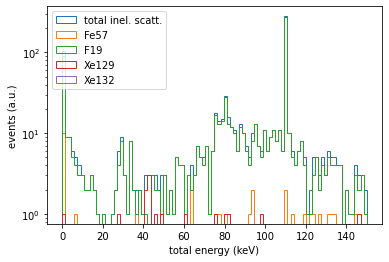

In [66]:
rangemin = 0
rangemax = 150
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(rangemin,rangemax), histtype='step', label = "total inel. scatt.")
plt.hist(neutronInelastic_energy_Fe57, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Fe57")
plt.hist(neutronInelastic_energy_F19, bins = 100, range=(rangemin,rangemax), histtype='step', label = "F19")
plt.hist(neutronInelastic_energy_Xe129, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Xe129")
plt.hist(neutronInelastic_energy_Xe132, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Xe132")

plt.xlabel('total energy (keV)')
plt.ylabel('events (a.u.)')
plt.legend(loc=2);
plt.yscale('log')
plt.show()

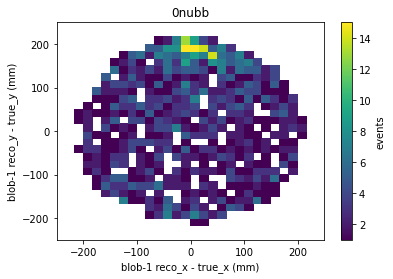

In [85]:
plt.hist2d(neutronInelastic_x_F19, neutronInelastic_y_F19, bins=(30, 30), range=((-250, 250), (-250, 250)), cmap='viridis', cmin=0.001)
plt.xlabel('blob-1 reco_x - true_x (mm)')
plt.ylabel('blob-1 reco_y - true_y (mm)')
plt.title('0nubb')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

In [68]:
non_nCapture_events = mother_particles[~(mother_particles.final_proc == "nCapture")].event_id.unique()

non_nCapture_events

array([   2,    4,    6, ..., 8853, 8860, 8888], dtype=int32)

In [69]:
evt_nCapture    = ~hits_500keV.event_id.isin(non_nCapture_events) 

hits_nCapture = hits_500keV[evt_nCapture]

In [70]:
hits_nCapture

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,-18.494698,92.543610,313.986053,8959.851562,0.000212,ACTIVE,4,0
1,0,-18.494678,92.543678,313.985992,8959.851562,0.000023,ACTIVE,246,0
2,0,-18.494694,92.543610,313.986053,8959.851562,0.000047,ACTIVE,245,0
3,0,-18.494699,92.543610,313.986053,8959.851562,0.000021,ACTIVE,244,0
4,0,-18.494701,92.543625,313.986053,8959.851562,0.000045,ACTIVE,243,0
...,...,...,...,...,...,...,...,...,...
914106,8900,160.835419,-76.126122,350.411285,207957.875000,0.000958,ACTIVE,129,0
914107,8900,160.781998,-76.081436,350.463959,207957.875000,0.005478,ACTIVE,129,1
914108,8900,160.721802,-76.108597,350.474365,207957.875000,0.001962,ACTIVE,129,2
914109,8900,160.739334,-76.063278,350.509705,207957.875000,0.027304,ACTIVE,129,3


In [71]:
nCapture_energy_500keV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_nCapture[hits_nCapture.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:nCapture_energy_500keV.append(totalenergy)

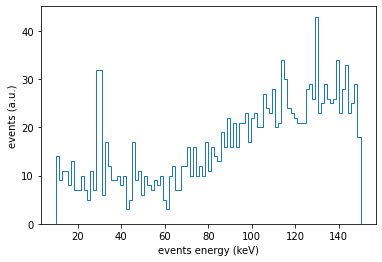

In [72]:
plt.hist(nCapture_energy_500keV, bins = 100, range=(10,150), histtype='step')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
#plt.yscale('log')
plt.show()

In [73]:
n_Capture = daughter_particles[(daughter_particles.creator_proc == "nCapture") 
                   & (daughter_particles.particle_name != "gamma")].particle_name

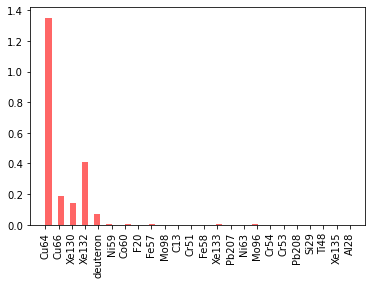

In [74]:
plt.hist(n_Capture, density=True, alpha=0.6, bins = 50, color='r')
plt.xticks(rotation=90)

plt.show()

In [75]:
particles_evt = particles[particles.event_id == 3]

In [76]:
R_clusterA = 50
clusterA_e, clusterA_x, clusterA_y, clusterA_z = [],[],[],[]
clusterB_e, clusterB_x, clusterB_y, clusterB_z = [],[],[],[]
for evt_number in range(0,ninteractions):
#evt_number = 103   
    clusterA_energy = 0
    clusterB_energy = 0
    clusterB_posx, clusterB_posy, clusterB_posz = [], [], []
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']
    evt_particles_nInelastic = daugther_particles_neutronInelastic[daugther_particles_neutronInelastic.event_id == evt_number]

    part_int = evt_particles_nInelastic.particle_name.unique()

    xt_atom = evt_particles_nInelastic.initial_x.unique()
    yt_atom = evt_particles_nInelastic.initial_y.unique()
    zt_atom = evt_particles_nInelastic.initial_z.unique()
    rt_atom = np.sqrt(xt_atom*xt_atom + yt_atom*yt_atom)

    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    et = evt_hits.energy*1000

    rt = np.sqrt(xt*xt + yt+yt)

    totalenergy = np.sum(et)

    for i in range(0, len(et)):
        if((np.abs(rt.values[i]-rt_atom) < R_clusterA) & (np.abs(zt.values[i]-zt_atom) < R_clusterA)) :
            clusterA_energy = clusterA_energy + et.values[i]
            print('Event valid')
        else:
            clusterB_energy = clusterB_energy + et.values[i]
            clusterB_posx.append(xt.values[i])
            clusterB_posy.append(yt.values[i])
            clusterB_posz.append(zt.values[i])
    
    if((clusterA_energy != 0) * (clusterB_energy != 0)):
        clusterA_e.append(clusterA_energy)
        clusterB_e.append(clusterB_energy)
        clusterA_x.append(xt_atom)
        clusterA_y.append(yt_atom)
        clusterA_z.append(zt_atom)
        clusterB_x.append(np.sum(clusterB_posx)/np.size(clusterB_posx))
        clusterB_y.append(np.sum(clusterB_posy)/np.size(clusterB_posy))
        clusterB_z.append(np.sum(clusterB_posz)/np.size(clusterB_posz))
        
    


/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

In [77]:
dCluster = []
for i in range(0, len(clusterA_e)):
    dist = np.sqrt((clusterA_x[i]-clusterB_x[i])**2
                            +(clusterA_y[i]-clusterB_y[i])**2
                            +(clusterA_z[i]-clusterB_z[i])**2)
    dCluster.append(dist[0])
len(dCluster)

81

No handles with labels found to put in legend.


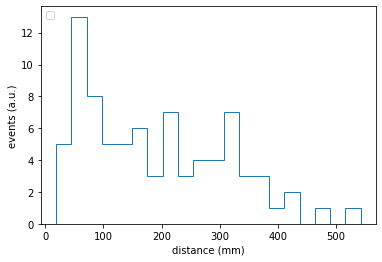

In [78]:
plt.hist(dCluster, bins = 20, histtype='step')

plt.xlabel('distance (mm)')
plt.ylabel('events (a.u.)')
plt.legend(loc=2);
plt.show()

In [79]:
R_clusterA = 10
dCluster = []
ClusterA_e_total, ClusterB_e_total = [], []
#ninteractions
notenoughenergy = 0
only1cluster = 0
for evt_number in range(0,20):
#evt_number = 7   
    clusterA_e, clusterA_x, clusterA_y, clusterA_z = [],[],[],[]
    clusterB_e, clusterB_x, clusterB_y, clusterB_z = [],[],[],[]
    clusterA_energy = 0
    clusterB_energy = 0
    clusterA_posx, clusterA_posy, clusterA_posz = [], [], []
    clusterB_posx, clusterB_posy, clusterB_posz = [], [], []
    #evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = hits[hits.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    et = evt_hits.energy*1000

    rt = np.sqrt(xt*xt + yt+yt)
    if(np.sum(et) < 1):
        notenoughenergy +=1
        print('Energy below threshold')
        print('-------')
        dCluster.append(0)
        ClusterA_e_total.append(0)
        ClusterB_e_total.append(0)
        continue
    minv = 1
    #print(len(et))
    for i in range(minv, len(et)):
        if((np.abs(rt.values[i]-rt.values[i-1]) < R_clusterA) & (np.abs(zt.values[i]-zt.values[i-1]) < R_clusterA)) :
            #print(f'Hit {i} valid - Cluster A')  
            clusterA_energy = clusterA_energy + et.values[i]
            clusterA_posx.append(xt.values[i])
            clusterA_posy.append(yt.values[i])
            clusterA_posz.append(zt.values[i])
        else:
            minv = i
            #print('Cluster A defined')
            break
    if(minv != minv):
        only1cluster += 1
        print('Only 1 Cluster')
        clusterA_x = np.mean(clusterA_posx)
        clusterA_y = np.mean(clusterA_posy)
        clusterA_r = np.sqrt(clusterA_x**2+clusterA_y**2)
        clusterA_z = np.mean(clusterA_posz)
        print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        print(f'Energy {clusterA_energy}')
        print(f'Total energy of event {np.sum(et)}')
        print('-------')
        dCluster.append(0)
        ClusterA_e_total.append(clusterA_energy)
        ClusterB_e_total.append(0)
        continue
    for i in range(minv, len(et)):
        if((np.abs(rt.values[i]-rt.values[i-1]) < R_clusterA) & (np.abs(zt.values[i]-zt.values[i-1]) < R_clusterA)) :
            #print(f'Hit {i} valid - Cluster B')
            print({i})
            clusterB_energy = clusterB_energy + et.values[i]
            clusterB_posx.append(xt.values[i])
            clusterB_posy.append(yt.values[i])
            clusterB_posz.append(zt.values[i])
        elif(i != minv):
            minv = i
            #print('Cluster B defined')
            break
    if(clusterA_energy == 0):
        print('Only 1 Cluster')
        print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        print(f'Energy {clusterB_energy}')
        print(f'Total energy of event {np.sum(et)}')
        print('-------')
        dCluster.append(0)
        ClusterA_e_total.append(clusterA_energy)
        ClusterB_e_total.append(0)
    else:
        clusterA_x = np.mean(clusterA_posx)
        clusterA_y = np.mean(clusterA_posy)
        clusterA_r = np.sqrt(clusterA_x**2+clusterA_y**2)
        clusterA_z = np.mean(clusterA_posz)
        #print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        clusterB_x = np.mean(clusterB_posx)
        clusterB_y = np.mean(clusterB_posy)
        clusterB_r = np.sqrt(clusterB_x**2+clusterB_y**2)
        clusterB_z = np.mean(clusterB_posz)
        #print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        dist = np.sqrt((clusterA_x-clusterB_x)**2
                                    +(clusterA_y-clusterB_y)**2
                                    +(clusterA_z-clusterB_z)**2)
        print('Two Clusters')
        print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        print(f'Energy {clusterA_energy}')
        print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        print(f'Energy {clusterB_energy}')
        print(f'Distance between clusters {dist}')
        print(f'Total energy of event {np.sum(et)}')
        print(f'Total energy both clusters {clusterA_energy+clusterB_energy}')
        print('-------')

        dCluster.append(dist)
        ClusterA_e_total.append(clusterA_energy)
        ClusterB_e_total.append(clusterB_energy)


NameError: name 'hits' is not defined

In [ ]:
R_clusterA = 20
dCluster = []
ClusterA_e_total, ClusterB_e_total, ClusterC_e_total = [], [], []
#ninteractions
nothreshold = 0
nothreshold_energy = []
only1cluster = 0
only1cluster_energy = []
twocluster = 0
twocluster_energy = []
morethan2cluster = 0
morethan2cluster_energy = []


for evt_number in range(0,ninteractions):
#evt_number = 7   
    clusterA_e, clusterA_x, clusterA_y, clusterA_z = [],[],[],[]
    clusterB_e, clusterB_x, clusterB_y, clusterB_z = [],[],[],[]
    clusterC_e, clusterC_x, clusterC_y, clusterC_z = [],[],[],[]
    clusterA_energy = 0
    clusterB_energy = 0
    clusterC_energy = 0
    clusterA_posx, clusterA_posy, clusterA_posz = [], [], []
    clusterB_posx, clusterB_posy, clusterB_posz = [], [], []
    clusterC_posx, clusterC_posy, clusterC_posz = [], [], []
    #evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = hits[hits.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    et = evt_hits.energy*1000

    rt = np.sqrt(xt*xt + yt+yt)
    if(np.sum(et) < 1):
        nothreshold +=1
        nothreshold_energy.append(np.sum(et))
        print('Energy below threshold')
        print('-------')
        continue
    minv = 1
    riniA = rt.values[0]
    ziniA = zt.values[0]
    clusterA_energy = et.values[0]
    riniB = 0
    ziniB = 0
    riniC = 0
    ziniC = 0
    #print(len(et))
    for i in range(minv, len(et)):
        if((np.abs(rt.values[i]-riniA) < R_clusterA) & (np.abs(zt.values[i]-ziniA) < R_clusterA)) :
            #print(f'Hit {i} valid - Cluster A')  
            clusterA_energy = clusterA_energy + et.values[i]
            clusterA_posx.append(xt.values[i])
            clusterA_posy.append(yt.values[i])
            clusterA_posz.append(zt.values[i])
        elif((riniB == 0) & (ziniB == 0)):
            riniB = rt.values[i]
            ziniB = zt.values[i]
            clusterB_energy = et.values[0]
            continue
        elif((np.abs(rt.values[i]-riniB) < R_clusterA) & (np.abs(zt.values[i]-ziniB) < R_clusterA)) :
            clusterB_energy = clusterB_energy + et.values[i]
            clusterB_posx.append(xt.values[i])
            clusterB_posy.append(yt.values[i])
            clusterB_posz.append(zt.values[i])
        elif((riniC == 0) & (ziniC == 0)):
            riniC = rt.values[i]
            ziniC = zt.values[i]
            clusterC_energy = et.values[0]
            continue   
        elif((np.abs(rt.values[i]-riniC) < R_clusterA) & (np.abs(zt.values[i]-ziniC) < R_clusterA)) :
            clusterC_energy = clusterC_energy + et.values[i]
            clusterC_posx.append(xt.values[i])
            clusterC_posy.append(yt.values[i])
            clusterC_posz.append(zt.values[i])
            
    if(clusterB_energy == 0):
        only1cluster += 1
        only1cluster_energy.append(np.sum(et))
        print('One Cluster')
        print('-------')
    elif(clusterC_energy == 0):
        twocluster += 1
        twocluster_energy.append(np.sum(et))
        clusterA_x = np.mean(clusterA_posx)
        clusterA_y = np.mean(clusterA_posy)
        clusterA_r = np.sqrt(clusterA_x**2+clusterA_y**2)
        clusterA_z = np.mean(clusterA_posz)
        #print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        clusterB_x = np.mean(clusterB_posx)
        clusterB_y = np.mean(clusterB_posy)
        clusterB_r = np.sqrt(clusterB_x**2+clusterB_y**2)
        clusterB_z = np.mean(clusterB_posz)

        clusterC_x = np.mean(clusterC_posx)
        clusterC_y = np.mean(clusterC_posy)
        clusterC_r = np.sqrt(clusterC_x**2+clusterC_y**2)
        clusterC_z = np.mean(clusterC_posz)
        #print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        dist = np.sqrt((clusterA_x-clusterB_x)**2
                                    +(clusterA_y-clusterB_y)**2
                                    +(clusterA_z-clusterB_z)**2)
        print('Two Clusters')
        #print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        #print(f'Energy {clusterA_energy}')
        #print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        #print(f'Energy {clusterB_energy}')
        #print(f'Cluster C (x,y,z)=({clusterC_x},{clusterC_y},{clusterC_z})')
        #print(f'Energy {clusterC_energy}')
        #print(f'Distance between clusters {dist}')
        #print(f'Total energy of event {np.sum(et)}')
        #print(f'Total energy both clusters {clusterA_energy+clusterB_energy}')
        print('-------')
        dCluster.append(dist)
        ClusterA_e_total.append(clusterA_energy)
        ClusterB_e_total.append(clusterB_energy)
    elif(clusterC_energy+clusterB_energy > 0.9*np.sum(et)):
        twocluster += 1
        twocluster_energy.append(np.sum(et))
        clusterA_x = np.mean(clusterA_posx)
        clusterA_y = np.mean(clusterA_posy)
        clusterA_r = np.sqrt(clusterA_x**2+clusterA_y**2)
        clusterA_z = np.mean(clusterA_posz)
        #print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        clusterB_x = np.mean(clusterB_posx)
        clusterB_y = np.mean(clusterB_posy)
        clusterB_r = np.sqrt(clusterB_x**2+clusterB_y**2)
        clusterB_z = np.mean(clusterB_posz)

        clusterC_x = np.mean(clusterC_posx)
        clusterC_y = np.mean(clusterC_posy)
        clusterC_r = np.sqrt(clusterC_x**2+clusterC_y**2)
        clusterC_z = np.mean(clusterC_posz)
        #print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')

        print('Two cluster')
        print('-------')
        dist = np.sqrt((clusterC_x-clusterB_x)**2
                                    +(clusterC_y-clusterB_y)**2
                                    +(clusterC_z-clusterB_z)**2)
        dCluster.append(dist)
        ClusterA_e_total.append(clusterB_energy)
        ClusterB_e_total.append(clusterC_energy)
    else:
        morethan2cluster += 1
        morethan2cluster_energy.append(np.sum(et))
        print('More than 2 Cluster')
        print('-------')

print('Total amount of events 20')
print(f'- Not enough energy = {nothreshold}')
print(f'- Only one cluster = {only1cluster}')
print(f'- Two cluster = {twocluster}')
print(f'- More than two cluster = {morethan2cluster}')


In [ ]:
print(f'- Number of initial events {ninteractions}')
print(f'- Not enough energy = {nothreshold}')
print(f'- Only one cluster = {only1cluster}')
print(f'- Two cluster = {twocluster}')
print(f'- More than two cluster = {morethan2cluster}')

In [ ]:
hits_energy = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_500keV[hits_500keV.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:hits_energy.append(totalenergy)

In [ ]:
plt.hist(hits_energy, bins = 100, range=(10,500), histtype='step', label = 'all events')
plt.hist(only1cluster_energy, bins = 100, range=(10,500), histtype='step', label = '1 cluster')
plt.hist(twocluster_energy, bins = 100, range=(10,500), histtype='step', label = '2 cluster')
plt.hist(morethan2cluster_energy, bins = 100, range=(10,500),histtype='step', label = 'more than 1')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')

plt.yscale('log')
plt.legend(loc=1);
plt.show()

In [ ]:
plt.hist(dCluster, bins = 100, range = (0,200), histtype='step')

plt.xlabel('distance (mm)')
plt.ylabel('events (a.u.)')
#plt.yscale("log")
plt.show()

In [ ]:
plt.hist(ClusterA_e_total, bins = 100, range = (0,300), histtype='step')

plt.xlabel('energy (keV)')
plt.ylabel('events (a.u.)')
#plt.yscale("log")
plt.show()

In [ ]:
plt.hist(ClusterB_e_total, bins = 100, range = (0,300), histtype='step')

plt.xlabel('energy (keV)')
plt.ylabel('events (a.u.)')
#plt.yscale("log")
plt.show()

In [ ]:
evt_hits = hits_500keV[hits_500keV.event_id == 2]
evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

xt = evt_hits.x
yt = evt_hits.y
zt = evt_hits.z
et = evt_hits.energy*1000
rt = np.sqrt(xt**2+yt**2)
evt_hits

In [ ]:
for i in range(0,len(rt)):
    print(f'(x,y)=({rt.values[i]},{zt.values[i]})')

In [ ]:
def sorter(item):
    # Since highest marks first, least error = most marks
    z = 500 - item[1]
    r = 200 - item[0]
    return (r, z)

participant_list = [(rt, zt)]


In [ ]:
rt

In [ ]:
sorted_list = sorted(participant_list, reverse=True)
participant_list

In [ ]:
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

plt.scatter(zt, rt, cmap='viridis', c=et)
plt.xlabel('z (mm)')
plt.ylabel('r (mm)')

cb = plt.colorbar(label='Energy (keV)')
plt.show()